In [1]:
import seaborn as sns
from matplotlib import rcParams
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
params = {'text.usetex': False, 'mathtext.fontset': 'stix'}
plt.rcParams.update(params)
import warnings
warnings.filterwarnings("ignore")
%matplotlib notebook
import pandas as pd
import matplotlib
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
import numpy as np

In [26]:
def line_plot_diff(column_x,column_y,dataframe,font,fs,model):
    SMALL_SIZE = 12
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 20

    fig, ax = plt.subplots(figsize=(7,5))
    
    dataframe['prediction'] = [i*27.2114 for i in dataframe['prediction'].tolist()]
    dataframe['ground truth'] = [i*27.2114 for i in dataframe['ground truth'].tolist()]
    sns.scatterplot(column_x, column_y, data=dataframe,color='#6b778d')
    sns.lineplot([0,3,6,9,12,15,18],[0,3,6,9,12,15,18],color='k',label='y_predicted = y_QM9')
    ax.lines[0].set_linestyle("--")
    
    y_test = dataframe[column_y].tolist()
    y_predicted = dataframe[column_x].tolist()
    R2 = round(r2_score(y_test, y_predicted),3)
    mae = round(MAE(y_test,y_predicted),3)
    a, b = np.polyfit(y_predicted, y_test, 1)
    
    sns.lineplot(y_predicted, [a*x+b for x in y_predicted], color='blue', 
                 label='\nModel Fit:\nR\u00b2 = {}\nMAE = {} eV'.format(R2,mae))
    ax.set_xlabel("Prediction (eV)",fontsize=MEDIUM_SIZE, 
                  fontname=font)
    ax.set_ylabel("Ground Truth (eV)",fontsize=MEDIUM_SIZE, 
                  fontname=font)
    
    ax.set_xticks([0,3,6,9,12,15,18])
    ax.set_yticks([0,3,6,9,12,15,18])
                   
    ax.grid(True, linewidth=0.5, color='0.95')
    plt.title("Prediction vs. Ground Truth ({})".format(model),
              fontsize=MEDIUM_SIZE,
              fontname=font,fontweight='bold')
    plt.legend(loc='lower right')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_axisbelow(True)

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)

    for tick in ax.get_yticklabels():
        tick.set_fontname(font)
        tick.set_fontsize(MEDIUM_SIZE)
    for tick in ax.get_xticklabels():
        tick.set_fontname(font)
        tick.set_fontsize(MEDIUM_SIZE)
    plt.show()
    fig.savefig('fig_{}.png'.format(fs), format='png', dpi=450)
    

In [27]:
import pandas as pd
df_chem_graph = pd.read_csv('analysis_chem_graph.csv')
print(df_chem_graph)
df_raw_distance = pd.read_csv('analysis_raw_distance.csv')
print(df_raw_distance)





        prediction  ground truth
0           0.2106        0.2021
1           0.2555        0.2563
2           0.1855        0.1532
3           0.1804        0.1801
4           0.2822        0.2795
...            ...           ...
133880      0.2950        0.2751
133881      0.1817        0.1893
133882      0.3031        0.2913
133883      0.2243        0.2264
133884      0.3346        0.3228

[133885 rows x 2 columns]
        prediction  ground truth
0           0.2076        0.2021
1           0.2581        0.2563
2           0.1677        0.1532
3           0.1895        0.1801
4           0.2869        0.2795
...            ...           ...
133880      0.2555        0.2751
133881      0.2017        0.1893
133882      0.3036        0.2913
133883      0.2181        0.2264
133884      0.3205        0.3228

[133885 rows x 2 columns]


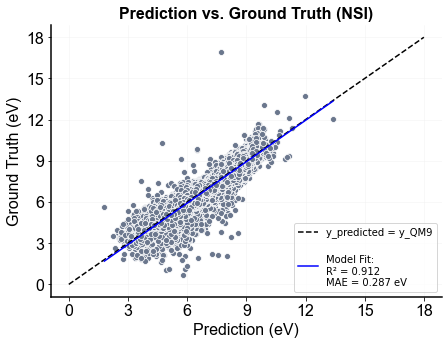

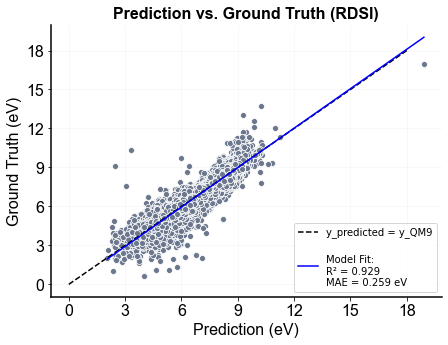

In [28]:
line_plot_diff('prediction','ground truth',df_chem_graph,'Arial','analysis_chem_graph','NSI')
line_plot_diff('prediction','ground truth',df_raw_distance,'Arial','analysis_raw_distance','RDSI')